# **Licenciatura em Ciências da Computação**

### Aprendizagem Computacional 25/26

## 0) Setup and Data Loading

Let's start by importing the essential libraries and loading our dataset.

*   Matplolib [tutorial](https://matplotlib.org/stable/tutorials/pyplot.html)
*   Seaborn [tutorial](https://seaborn.pydata.org/tutorial/introduction.html)
*   Scikit-Learn [turotial](https://scikit-learn.org/1.4/tutorial/basic/tutorial.html)

In [3]:
# Essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.datasets import make_blobs

# Configuration
plt.style.use('default')
sns.set_palette("husl")
pd.set_option('display.max_rows', 8)
np.random.seed(42)

print(f"NumPy: {np.__version__}")
print(f"Pandas: {pd.__version__}")
print(f"Scikit-learn: {__import__('sklearn').__version__}")

NumPy: 2.4.2
Pandas: 3.0.0
Scikit-learn: 1.8.0


## 1) What is Machine Learning?

**Machine Learning (ML)** is a field of artificial intelligence where computers learn patterns from data without being explicitly programmed for every task.

### Types of Machine Learning:

1. **Supervised Learning**: Learn from labeled examples (input → known output)
   - *Example*: Predicting chemical compound toxicity from molecular structure

2. **Unsupervised Learning**: Find hidden patterns in data without labels
   - *Example*: Grouping similar chemical compounds based on their properties

3. **Reinforcement Learning**: Learn through interaction and rewards
   - *Example*: Optimizing reaction conditions through trial and error

**Today's focus: Unsupervised Learning** 🎯

## 2) Unsupervised Learning Overview

### What is Unsupervised Learning?
- **No target variable** (no "correct answer" to learn)
- **Goal**: Discover hidden structures and patterns in data
- **Applications**: Customer segmentation, gene expression analysis, chemical compound classification

### Main Techniques We'll Cover:
1. **Clustering**: Group similar data points together
2. **Dimensionality Reduction**: Simplify complex data while preserving important information

## 3) Data Preparation and Exploration

Let's start with a chemical engineering example: analyzing different chemical compounds based on their properties.

In [4]:
# Create a synthetic chemical compounds dataset
np.random.seed(42)

# Simulate chemical compound properties
n_compounds = 150

# Generate compound data with 3 natural groups
# Group 1: Small organic molecules (low MW, high solubility)
# Group 2: Medium polymers (medium MW, medium solubility)
# Group 3: Large proteins (high MW, low solubility)

compounds_data = []
labels_true = []

# Group 1: Small molecules
for i in range(50):
    mw = np.random.normal(150, 30)  # Molecular weight  #mean, std
    solubility = np.random.normal(8, 1.5)  # Log solubility
    melting_point = np.random.normal(80, 20)
    compounds_data.append([mw, solubility, melting_point])
    labels_true.append(0)

# Group 2: Medium molecules
for i in range(50):
    mw = np.random.normal(500, 100)
    solubility = np.random.normal(4, 1)
    melting_point = np.random.normal(180, 30)
    compounds_data.append([mw, solubility, melting_point])
    labels_true.append(1)

# Group 3: Large molecules
for i in range(50):
    mw = np.random.normal(1200, 200)
    solubility = np.random.normal(1, 0.8)
    melting_point = np.random.normal(280, 40)
    compounds_data.append([mw, solubility, melting_point])
    labels_true.append(2)

# Create DataFrame
compounds_df = pd.DataFrame(
    compounds_data,
    columns=['molecular_weight', 'log_solubility', 'melting_point']
)

# Add compound names
compound_names = [f"Compound_{i+1:03d}" for i in range(n_compounds)]
compounds_df['compound_name'] = compound_names

print("Chemical Compounds Dataset:")
print(compounds_df.head())
print(f"\nDataset shape: {compounds_df.shape}")

Chemical Compounds Dataset:
   molecular_weight  log_solubility  melting_point compound_name
0        164.901425        7.792604      92.953771  Compound_001
1        195.690896        7.648770      75.317261  Compound_002
2        197.376384        9.151152      70.610512  Compound_003
3        166.276801        7.304873      70.685405  Compound_004
4        157.258868        5.130080      45.501643  Compound_005

Dataset shape: (150, 4)


In [5]:
# Explore the data
compounds_df.describe()

,molecular_weight,log_solubility,melting_point
count,150.000000,150.000000,150.000000
mean,626.110300,4.191975,183.578467
std,456.950150,3.032383,90.354507
min,107.944468,-0.699117,27.605098
25%,160.852768,1.557595,90.757393
50%,527.884133,3.710037,190.484090
75%,1046.247376,6.817986,263.462731
max,1637.960587,10.829279,366.127298


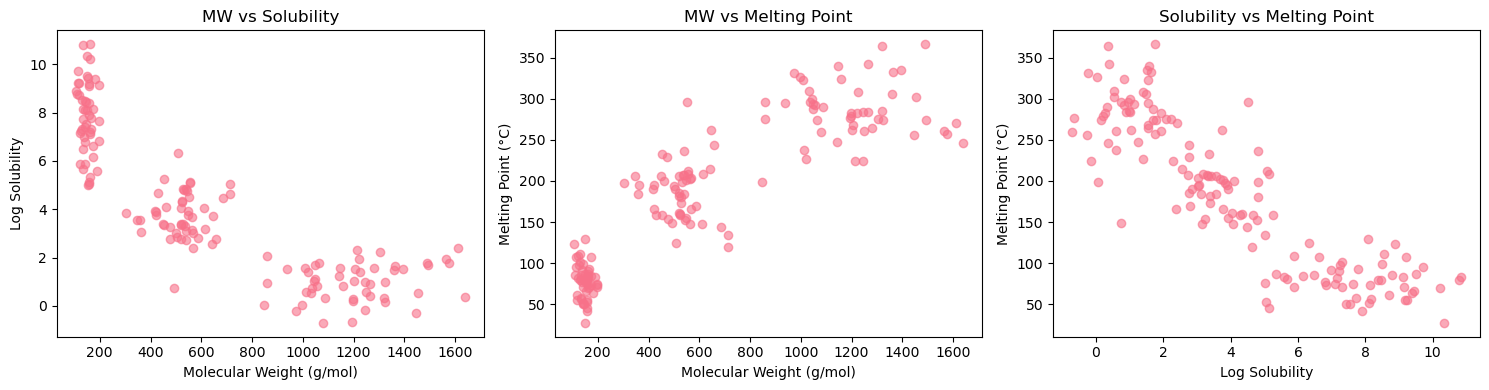

Can you see any patterns or groups in the data?


In [6]:
# Visualize the relationships between variables
fig, axes = plt.subplots(1, 3, figsize=(15, 4))  #rows, columns

# Molecular Weight vs Log Solubility
axes[0].scatter(compounds_df['molecular_weight'], compounds_df['log_solubility'], alpha=0.6)
axes[0].set_xlabel('Molecular Weight (g/mol)')
axes[0].set_ylabel('Log Solubility')
axes[0].set_title('MW vs Solubility')

# Molecular Weight vs Melting Point
axes[1].scatter(compounds_df['molecular_weight'], compounds_df['melting_point'], alpha=0.6)
axes[1].set_xlabel('Molecular Weight (g/mol)')
axes[1].set_ylabel('Melting Point (°C)')
axes[1].set_title('MW vs Melting Point')

# Log Solubility vs Melting Point
axes[2].scatter(compounds_df['log_solubility'], compounds_df['melting_point'], alpha=0.6)
axes[2].set_xlabel('Log Solubility')
axes[2].set_ylabel('Melting Point (°C)')
axes[2].set_title('Solubility vs Melting Point')

plt.tight_layout()  #automatically adjust the spacing between subplots so things don't overlap
plt.show()

print("Can you see any patterns or groups in the data?")

### Mini‑exercises (Data Exploration) | ~10 min
1. Calculate the correlation matrix between the three numerical variables.
2. Create a histogram for each of the three properties.
3. Which two variables seem most strongly correlated?

In [ ]:
# Space for Data Exploration exercises
# Tip: search for correlation matrix pandas and histogram matplotlib


## 4) Clustering Analysis

**Clustering** is the process of grouping similar data points together.

### Why Cluster Chemical Compounds?
- **Drug discovery**: Group compounds with similar biological activity
- **Process optimization**: Identify compounds that behave similarly under certain conditions
- **Quality control**: Detect unusual or outlier compounds

### Data Preprocessing: Scaling

Before clustering, we need to **scale** our features because they have different units and ranges.

In [ ]:
# Simple example of standardization
data = np.array([
    [10, 1],
    [12, 1.2],
    [8, 0.8],
    [11, 1.1],
    [9, 0.9]
])

print("Original Data:")
print(data)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

print("\nScaled Data (Mean ≈ 0, Std Dev ≈ 1):")
print(scaled_data)

print("\nNotice how the scales of the two features are now comparable.")

In [ ]:
# Prepare features for clustering (exclude compound names)
features = compounds_df[['molecular_weight', 'log_solubility', 'melting_point']]

print("Before scaling:")
print(features.describe())

# Scale the features (mean=0, std=1)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Convert back to DataFrame for easier handling
features_scaled_df = pd.DataFrame(
    features_scaled,
    columns=['molecular_weight_scaled', 'log_solubility_scaled', 'melting_point_scaled']
)

print("\nAfter scaling:")
print(features_scaled_df.describe())

print("\nWhy scaling? All features now have mean≈0 and std≈1, so no single feature dominates!")

### 4.1 K-Means Clustering

**K-Means** is one of the most popular clustering algorithms:
- Divides data into **k** clusters
- Each point belongs to the cluster with the nearest **centroid** (center)
- **Challenge**: We need to choose k (number of clusters) beforehand

Elbow method: choose the number of clusters where adding more clusters no longer significantly reduces within-cluster variance (inertia). Inertia = sum of squared distances of points to their cluster centroid.

Silhouette score: choose the number of clusters that maximizes how well points are grouped within their cluster and separated from other clusters. Silhouette score = average normalized difference between a point’s distance to its own cluster and its distance to the nearest other cluster. i.e. How compact AND how well separated clusters are.

Inertia rewards model complexity; silhouette penalizes over-partitioning.

In [ ]:
# Let's try K-Means with different numbers of clusters
# We'll use the "elbow method" to find the optimal k

k_range = range(1, 11)
inertias = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)   #n_init: Number of times the k-means algorithm is run with different centroid seeds.
    kmeans.fit(features_scaled)     #learn the clusters from this data
    inertias.append(kmeans.inertia_)

    # Silhouette score (only for k > 1)
    if k > 1:
        sil_score = silhouette_score(features_scaled, kmeans.labels_) #labels: which cluster it was assigned to
        silhouette_scores.append(sil_score)
    else:
        silhouette_scores.append(0)

# Plot the elbow curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Elbow plot
ax1.plot(k_range, inertias, 'bo-') #blue, circle each data point, - solid line
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia (Within-cluster sum of squares)')
ax1.set_title('Elbow Method for Optimal k')
ax1.grid(True, alpha=0.3)

# Silhouette score plot
ax2.plot(k_range, silhouette_scores, 'ro-')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score vs k')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Inertia (Within-cluster sum of squares): Lower is better")
#Inertia = the total squared distance from every point to the center of the cluster it was assigned to.
print("Elbow Method: Look for the 'elbow' where inertia stops decreasing rapidly")
print("Silhouette Score: Higher is better (range: -1 to 1)")

In [ ]:
# Based on the plots, let's use k=3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10, max_iter=300)
#n_init=10 -> K-Means 10 separate times with different random centroid initializations
cluster_labels = kmeans.fit_predict(features_scaled) #fit_predict returns the clusters

# Add cluster labels to our dataframe
compounds_df['cluster'] = cluster_labels

print(f"K-Means with k={optimal_k}:")
print(f"Silhouette Score: {silhouette_score(features_scaled, cluster_labels):.3f}")
print("\nCluster sizes:")
print(compounds_df['cluster'].value_counts().sort_index())

In [ ]:
import numpy as np
# Visualize the clusters
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Define colors for clusters
colors = ['red', 'blue', 'green']

# Get cluster centroids (scaled)
centroids_scaled = kmeans.cluster_centers_

# Inverse transform centroids to original scale for plotting
centroids_original = scaler.inverse_transform(centroids_scaled)

# MW vs Log Solubility
for i in range(optimal_k):
    cluster_data = compounds_df[compounds_df['cluster'] == i]
    axes[0].scatter(cluster_data['molecular_weight'], cluster_data['log_solubility'],
                   c=colors[i], label=f'Cluster {i}', alpha=0.7)
    # Plot centroid
    axes[0].scatter(centroids_original[i, 0], centroids_original[i, 1], marker='X', s=200, c='black', edgecolor='white', linewidth=1, label=f'Centroid {i}', zorder=10)

axes[0].set_xlabel('Molecular Weight (g/mol)')
axes[0].set_ylabel('Log Solubility')
axes[0].set_title('Clusters: MW vs Solubility with Centroids')
# Handle duplicate labels for centroids by creating custom legend handles
handles, labels = axes[0].get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
axes[0].legend(unique_labels.values(), unique_labels.keys())


# MW vs Melting Point
for i in range(optimal_k):
    cluster_data = compounds_df[compounds_df['cluster'] == i]
    axes[1].scatter(cluster_data['molecular_weight'], cluster_data['melting_point'],
                   c=colors[i], label=f'Cluster {i}', alpha=0.7)
    # Plot centroid
    axes[1].scatter(centroids_original[i, 0], centroids_original[i, 2], marker='X', s=200, c='black', edgecolor='white', linewidth=1, label=f'Centroid {i}', zorder=10)
axes[1].set_xlabel('Molecular Weight (g/mol)')
axes[1].set_ylabel('Melting Point (°C)')
axes[1].set_title('Clusters: MW vs Melting Point with Centroids')
handles, labels = axes[1].get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
axes[1].legend(unique_labels.values(), unique_labels.keys())


# Solubility vs Melting Point
for i in range(optimal_k):
    cluster_data = compounds_df[compounds_df['cluster'] == i]
    axes[2].scatter(cluster_data['log_solubility'], cluster_data['melting_point'],
                   c=colors[i], label=f'Cluster {i}', alpha=0.7)
    # Plot centroid
    axes[2].scatter(centroids_original[i, 1], centroids_original[i, 2], marker='X', s=200, c='black', edgecolor='white', linewidth=1, label=f'Centroid {i}', zorder=10)
axes[2].set_xlabel('Log Solubility')
axes[2].set_ylabel('Melting Point (°C)')
axes[2].set_title('Clusters: Solubility vs Melting Point with Centroids')
handles, labels = axes[2].get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
axes[2].legend(unique_labels.values(), unique_labels.keys())

plt.tight_layout()
plt.show()

In [ ]:
# Analyze the characteristics of each cluster
print("Cluster Characteristics:")
print("=" * 50)

cluster_summary = compounds_df.groupby('cluster')[['molecular_weight', 'log_solubility', 'melting_point']].agg(['mean', 'std'])
print(cluster_summary)

print("\nCluster Interpretation:")
for i in range(optimal_k):
    cluster_data = compounds_df[compounds_df['cluster'] == i]
    avg_mw = cluster_data['molecular_weight'].mean()
    avg_sol = cluster_data['log_solubility'].mean()
    avg_mp = cluster_data['melting_point'].mean()

    print(f"\nCluster {i} ({len(cluster_data)} compounds):")
    print(f"  - Average MW: {avg_mw:.1f} g/mol")
    print(f"  - Average Log Solubility: {avg_sol:.1f}")
    print(f"  - Average Melting Point: {avg_mp:.1f}°C")

    # Interpret the cluster
    if avg_mw < 300:
        size = "Small"
    elif avg_mw < 800:
        size = "Medium"
    else:
        size = "Large"

    if avg_sol > 6:
        sol = "High solubility"
    elif avg_sol > 3:
        sol = "Medium solubility"
    else:
        sol = "Low solubility"

    print(f"  → {size} molecules with {sol.lower()}")

### Mini‑exercises (Hierarchical Clustering) - ~15 min

Hierarchical clustering, specifically **Agglomerative Clustering**, is another unsupervised learning technique that builds a hierarchy of clusters. Unlike K-Means, you don't need to specify the number of clusters beforehand, although you often need to decide where to cut the hierarchy to form clusters.

Here's how to import and use it:

1. **Apply Agglomerative Clustering:** Use `AgglomerativeClustering` from `sklearn.cluster`. Apply it to the `features_scaled` data, setting `n_clusters` to 3 to compare with the K-Means results.
2. **Compare Silhouette Scores:** Calculate and print the silhouette score for the Agglomerative Clustering results and compare it to the K-Means silhouette score you calculated earlier. What do you observe?
3. **Visualize Results:** Create a scatter plot showing the Molecular Weight (scaled) versus Log Solubility (scaled), coloring the points based on the cluster labels from the Agglomerative Clustering. How does this visualization compare to the K-Means visualization of the same features?

In [ ]:
agg_clustering_compounds = AgglomerativeClustering(n_clusters=3)
#...

## 5) Dimensionality Reduction with PCA

**Principal Component Analysis (PCA)** is a technique that:
- **Reduces dimensions** while preserving most of the variance in data
- **Finds principal components**: directions of maximum variance
- **Applications**: Data visualization, noise reduction, feature extraction

### Why Use PCA?
- **Visualization**: Reduce 3D+ data to 2D for plotting
- **Storage**: Compress data with minimal information loss
- **Analysis**: Remove noise and focus on main patterns

PCA helps us understand the main directions of variance in our data and can reduce the number of features while keeping most of the information.

Let's use first a 2D dataset.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

n = 300
x = np.random.normal(0, 3, n)     # large variance
y = np.random.normal(0, 0.8, n)   # small variance

# Rotate by 30 degrees
theta = np.deg2rad(30)

# Manual rotation (no matrix multiplication operator)
x_rot = x * np.cos(theta) - y * np.sin(theta)
y_rot = x * np.sin(theta) + y * np.cos(theta)

# Stack back together
X_data = np.column_stack((x_rot, y_rot))

# Plot
plt.figure(figsize=(6,5))
plt.scatter(X_rot[:, 0], X_rot[:, 1], alpha=0.5)
plt.axhline(0, lw=1)
plt.axvline(0, lw=1)
plt.title("Simple 2D Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Use your rotated data here
X_data = X_rot  # (or whatever you named it)

pca = PCA(n_components=2)
Z = pca.fit_transform(X_data)

print("PCA components (loadings):")
print(pca.components_)
print("\nExplained variance ratio:")
print(pca.explained_variance_ratio_)

pc1, pc2 = pca.components_[0], pca.components_[1]
print(f"\nPC1 ≈ ({pc1[0]:+.2f})*Feature1 + ({pc1[1]:+.2f})*Feature2")
print(f"PC2 ≈ ({pc2[0]:+.2f})*Feature1 + ({pc2[1]:+.2f})*Feature2")

# ---- Plot original space + PC directions ----
plt.figure(figsize=(6, 5))
plt.scatter(X_data[:, 0], X_data[:, 1], alpha=0.5)
plt.title("Original feature space + PCA directions")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True, alpha=0.3)

# Draw arrows from the data mean
mu = X_data.mean(axis=0)
lengths = np.sqrt(pca.explained_variance_)  # [len_PC1, len_PC2]
scale = 2  # just visual multiplier

for vec, L, label in [(pc1, lengths[0], "PC1"), (pc2, lengths[1], "PC2")]:
    dx, dy = vec[0] * L * scale, vec[1] * L * scale
    plt.arrow(mu[0], mu[1], dx, dy, width=0.05, length_includes_head=True)
    plt.text(mu[0] + dx*1.05, mu[1] + dy*1.05, label)

plt.show()

# ---- Plot PCA space ----
plt.figure(figsize=(6, 5))
plt.scatter(Z[:, 0], Z[:, 1], alpha=0.5)
plt.axhline(0, lw=1)
plt.axvline(0, lw=1)
plt.title("Data in PCA space (PC1 vs PC2)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True, alpha=0.3)
plt.show()


## PCA on the Chemical Dataset

In [ ]:
# Apply PCA to our chemical compounds data
pca = PCA()
pca_features = pca.fit_transform(features_scaled)

# Check explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("PCA Results:")
print("=" * 30)
for i, (ev, cv) in enumerate(zip(explained_variance, cumulative_variance)):
    print(f"PC{i+1}: {ev:.3f} ({ev*100:.1f}%) - Cumulative: {cv:.3f} ({cv*100:.1f}%)")

# Plot explained variance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Individual variance
ax1.bar(range(1, len(explained_variance)+1), explained_variance)
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance Ratio')
ax1.set_title('Explained Variance by Component')
ax1.set_xticks(range(1, len(explained_variance)+1))

# Cumulative variance
ax2.plot(range(1, len(cumulative_variance)+1), cumulative_variance, 'bo-')
ax2.axhline(y=0.95, color='r', linestyle='--', label='95% threshold')
ax2.set_xlabel('Number of Components')
ax2.set_ylabel('Cumulative Explained Variance')
ax2.set_title('Cumulative Explained Variance')
ax2.set_xticks(range(1, len(cumulative_variance)+1))
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Visualize data in PCA space (2D)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# PCA visualization colored by K-Means clusters
for i in range(3):
    cluster_data = compounds_df[compounds_df['cluster'] == i]
    cluster_indices = cluster_data.index
    ax1.scatter(pca_features[cluster_indices, 0], pca_features[cluster_indices, 1],
               c=colors[i], label=f'Cluster {i}', alpha=0.7)
ax1.set_xlabel(f'PC1 ({explained_variance[0]*100:.1f}% variance)')
ax1.set_ylabel(f'PC2 ({explained_variance[1]*100:.1f}% variance)')
ax1.set_title('PCA Visualization (K-Means Clusters)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# PCA visualization colored by true groups (if we knew them)
for i in range(3):
    true_group_indices = np.array([j for j in range(len(labels_true)) if labels_true[j] == i])
    ax2.scatter(pca_features[true_group_indices, 0], pca_features[true_group_indices, 1],
               c=colors[i], label=f'True Group {i}', alpha=0.7)
ax2.set_xlabel(f'PC1 ({explained_variance[0]*100:.1f}% variance)')
ax2.set_ylabel(f'PC2 ({explained_variance[1]*100:.1f}% variance)')
ax2.set_title('PCA Visualization (True Groups)')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nFirst 2 PCs capture {cumulative_variance[1]*100:.1f}% of the total variance!")

In [ ]:
# Understand what the Principal Components represent
print("Principal Component Loadings:")
print("(How much each original variable contributes to each PC)")
print("=" * 60)

feature_names = ['Molecular Weight', 'Log Solubility', 'Melting Point']
loadings_df = pd.DataFrame(
    pca.components_.T, #pca.components_ is a matrix that comes out of PCA after, .T means transpose.
    columns=[f'PC{i+1}' for i in range(len(pca.components_))],
    index=feature_names
)

print(loadings_df)

print("\nInterpretation:")
print(f"PC1: Mainly driven by {feature_names[np.argmax(np.abs(pca.components_[0]))]}")
print(f"PC2: Mainly driven by {feature_names[np.argmax(np.abs(pca.components_[1]))]}")

# Visualize loadings
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(pca.components_, cmap='coolwarm', aspect='auto')
ax.set_xticks(range(len(feature_names)))
ax.set_xticklabels(feature_names, rotation=45)
ax.set_yticks(range(len(pca.components_)))
ax.set_yticklabels([f'PC{i+1}' for i in range(len(pca.components_))])
ax.set_title('PCA Loadings Heatmap')
plt.colorbar(im)
plt.tight_layout()
plt.show()

### Mini‑exercises (PCA) — ~10 min
1. How many principal components do we need to capture 95% of the variance?
2. Create a new compound with properties [MW=300, log_sol=5, MP=150] and project it into PCA space.

In [ ]:
new_compound_properties = pd.DataFrame(
    [[300, 5, 150]],
    columns=['molecular_weight', 'log_solubility', 'melting_point']
)


# We need to scale the new compound properties using the same scaler fitted on the original data
new_compound_scaled = scaler.transform(new_compound_properties)

# Project the scaled new compound into PCA space using the fitted PCA model
new_compound_pca = pca.transform(new_compound_scaled)

print(f"\nScaled properties of the new compound: {new_compound_scaled}")
print(f"New compound projected into PCA space (PC1, PC2, PC3): {new_compound_pca}")

## 6) Real-World Example: Palmer Penguins

Let's apply our unsupervised learning techniques to a real dataset - the Palmer Penguins dataset we used in Class 5!

In [ ]:
# Load the Palmer Penguins dataset
url = "https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv"
penguins_raw = pd.read_csv(url)

# Clean the data (remove rows with missing values in key columns)
cols_needed = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
penguins_clean = penguins_raw.dropna(subset=cols_needed).copy()

print("Penguins Dataset:")
print(penguins_clean.head())
print(f"\nShape: {penguins_clean.shape}")
print(f"Species: {penguins_clean['species'].unique()}")

In [ ]:
# Prepare features for unsupervised learning
penguin_features = penguins_clean[cols_needed]

# Scale the features
scaler_penguins = StandardScaler()
penguin_features_scaled = scaler_penguins.fit_transform(penguin_features)

print("Penguin features prepared for ML:")
print(f"Original features shape: {penguin_features.shape}")
print(f"Scaled features shape: {penguin_features_scaled.shape}")

In [ ]:
# Apply K-Means clustering (we'll try k=3 since there are 3 species)
kmeans_penguins = KMeans(n_clusters=3, random_state=42, n_init=10)
penguin_clusters = kmeans_penguins.fit_predict(penguin_features_scaled)

# Add cluster labels
penguins_clean['km_cluster'] = penguin_clusters

print("K-Means Clustering on Penguins:")
print(f"Silhouette Score: {silhouette_score(penguin_features_scaled, penguin_clusters):.3f}")
print("\nCluster sizes:")
print(penguins_clean['km_cluster'].value_counts().sort_index())

# Compare with true species labels
print("\nTrue species counts:")
print(penguins_clean['species'].value_counts())

In [ ]:
# Apply PCA for visualization
pca_penguins = PCA()
penguin_pca_features = pca_penguins.fit_transform(penguin_features_scaled)

print("PCA on Penguins:")
print("Explained variance ratio:")
for i, var in enumerate(pca_penguins.explained_variance_ratio_):
    print(f"  PC{i+1}: {var:.3f} ({var*100:.1f}%)")

cumulative_var = np.cumsum(pca_penguins.explained_variance_ratio_)
print(f"\nFirst 2 PCs explain {cumulative_var[1]*100:.1f}% of variance")

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Create a mapping from species names to numbers for comparison
species_mapping = {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}
true_labels = penguins_clean['species'].map(species_mapping)

# Calculate confusion matrix
cm = confusion_matrix(true_labels, penguin_clusters)

print("Confusion Matrix (True Species vs KM Clusters):")
print("Rows: True species (0=Adelie, 1=Chinstrap, 2=Gentoo)")
print("Cols: KM clusters (0, 1, 2)")
print(cm)

# Calculate accuracy (with best possible alignment)
from scipy.optimize import linear_sum_assignment
# Hungarian algorithm to find best cluster-species alignment
row_ind, col_ind = linear_sum_assignment(-cm)
accuracy = cm[row_ind, col_ind].sum() / cm.sum()

print(f"\nBest possible clustering accuracy (correctly labeled): {accuracy:.3f} ({accuracy*100:.1f}%)")
print(f"Adjusted Rand Score (clusters structure): {adjusted_rand_score(true_labels, penguin_clusters):.3f}")

# Show cluster characteristics
print("\nKM Cluster Characteristics:")
cluster_stats = penguins_clean.groupby('km_cluster')[cols_needed].mean()
print(cluster_stats)

In [ ]:
# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Define common species colors
species_colors = {'Adelie': 'red', 'Chinstrap': 'blue', 'Gentoo': 'green'}

km_cluster_colors_map = {
    col_ind[0]: species_colors[list(species_mapping.keys())[row_ind[0]]], # Cluster for Adelie
    col_ind[1]: species_colors[list(species_mapping.keys())[row_ind[1]]], # Cluster for Chinstrap
    col_ind[2]: species_colors[list(species_mapping.keys())[row_ind[2]]]  # Cluster for Gentoo
}

# Sort km_cluster_colors_list by cluster label for consistent indexing in plotting loop
km_cluster_colors_list = [km_cluster_colors_map[k] for k in sorted(km_cluster_colors_map.keys())]

# 1. PCA colored by KM clusters
for i in sorted(penguins_clean['km_cluster'].unique()):
    cluster_mask = penguins_clean['km_cluster'] == i
    axes[0,0].scatter(penguin_pca_features[cluster_mask, 0],
                     penguin_pca_features[cluster_mask, 1],
                     c=km_cluster_colors_list[i], label=f'KM Cluster {i}', alpha=0.7)
axes[0,0].set_xlabel(f'PC1 ({pca_penguins.explained_variance_ratio_[0]*100:.1f}%)')
axes[0,0].set_ylabel(f'PC2 ({pca_penguins.explained_variance_ratio_[1]*100:.1f}%)')
axes[0,0].set_title('PCA: KM Clusters')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. PCA colored by true species
for species, color in species_colors.items():
    species_mask = penguins_clean['species'] == species
    axes[0,1].scatter(penguin_pca_features[species_mask, 0],
                     penguin_pca_features[species_mask, 1],
                     c=color, label=species, alpha=0.7)
axes[0,1].set_xlabel(f'PC1 ({pca_penguins.explained_variance_ratio_[0]*100:.1f}%)')
axes[0,1].set_ylabel(f'PC2 ({pca_penguins.explained_variance_ratio_[1]*100:.1f}%)')
axes[0,1].set_title('PCA: True Species')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 3. Original features: Bill dimensions
for species, color in species_colors.items():
    species_data = penguins_clean[penguins_clean['species'] == species]
    axes[1,0].scatter(species_data['bill_length_mm'], species_data['bill_depth_mm'],
                     c=color, label=species, alpha=0.7)
axes[1,0].set_xlabel('Bill Length (mm)')
axes[1,0].set_ylabel('Bill Depth (mm)')
axes[1,0].set_title('Original Features: Bill Dimensions')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 4. Original features: Physical size
for species, color in species_colors.items():
    species_data = penguins_clean[penguins_clean['species'] == species]
    axes[1,1].scatter(species_data['flipper_length_mm'], species_data['body_mass_g'],
                     c=color, label=species, alpha=0.7)
axes[1,1].set_xlabel('Flipper Length (mm)')
axes[1,1].set_ylabel('Body Mass (g)')
axes[1,1].set_title('Original Features: Physical Size')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Understand what the Principal Components represent for penguins
print("Principal Component Loadings (Penguins):")
print("(How much each original variable contributes to each PC)")
print("=" * 70)

penguin_feature_names = cols_needed
penguin_loadings_df = pd.DataFrame(
    pca_penguins.components_.T,
    columns=[f'PC{i+1}' for i in range(len(pca_penguins.components_))],
    index=penguin_feature_names
)

print(penguin_loadings_df)

print("\nInterpretation:")
print(f"PC1: Mainly driven by {penguin_feature_names[np.argmax(np.abs(pca_penguins.components_[0]))]}")
print(f"PC2: Mainly driven by {penguin_feature_names[np.argmax(np.abs(pca_penguins.components_[1]))]}")

# Visualize loadings
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(pca_penguins.components_, cmap='coolwarm', aspect='auto')
ax.set_xticks(range(len(penguin_feature_names)))
ax.set_xticklabels(penguin_feature_names, rotation=45)
ax.set_yticks(range(len(pca_penguins.components_)))
ax.set_yticklabels([f'PC{i+1}' for i in range(len(pca_penguins.components_))])
ax.set_title('PCA Loadings Heatmap (Penguins)')
plt.colorbar(im)
plt.tight_layout()
plt.show()

cm[0, 0] = 24: 24 Adelie penguins were put in Cluster 0.

cm[0, 2] = 127: 127 Adelie were put in Cluster 2.

cm[2, 1] = 123: 123 Gentoo were put in Cluster 1.

<br><br>

---
# Comprehensive Practice


🍷 Wine Dataset

In this section, you will apply the complete pipeline covered in class to a real dataset.

We will use the **Wine dataset** available directly from `sklearn`. This dataset contains physicochemical properties of wines and their class labels.

Your goal is to apply:

- Standardization  
- Exploratory analysis (plots + correlation matrix)  
- PCA  
- K-Means clustering  
- Elbow method  
- Silhouette analysis

In [ ]:
from sklearn.datasets import load_wine
# Load dataset
wine = load_wine()

X = wine.data
y = wine.target

df = pd.DataFrame(X, columns=wine.feature_names)
df["target"] = y

df.head()